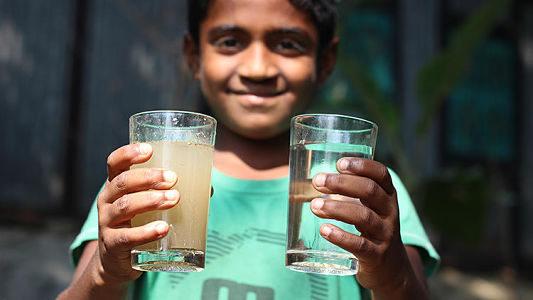

# Introduction

**Declining water quality has become a global issue of concern as human populations grow, industrial and agricultural activities expand, and climate change threatens to cause major alterations to the hydrological cycle. ... Poor water quality has a direct impact on water quantity in a number of ways.**

>>> *This dataset will bring us some insights towards factor which are responsible for potability of water, so lets dive in*

### Content
The water_potability.csv file contains water quality metrics for 3276 different water bodies,across various columns described below:

**1. pH value** :  WHO has recommended maximum permissible limit of pH from 6.5 to 8.5

**2. Hardness**: Hardness is mainly caused by calcium and magnesium salts.

**3. Solids (Total dissolved solids - TDS)**:Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

**4. Chloramines**: Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

**5. Sulfate:** It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

**6. Conductivity:** According to WHO standards, EC value should not exceeded 400 μS/cm.

**7. Organic_carbon:** According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

**8. Trihalomethanes:** THM levels up to 80 ppm is considered safe in drinking water.

**9. Turbidity:** The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

**10. Potability:** Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

#### Importing basic Libraries:

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')



In [ ]:
data = pd.read_csv("../input/water-potability/water_potability.csv")
data.head()

***lets see some descriptive stats of our dataset***

In [ ]:
data.describe()

In [ ]:
data.shape

In [ ]:
data["Potability"].value_counts(normalize=True)

*our dataset is not heavily imbalanced , having a ratio of 60/40*

# EDA

**lets get some visual insights from our dataset** 

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="Potability",data=data,saturation=1,palette="magma")

In [ ]:
data.corr()

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),cmap='coolwarm')

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(10,8))

ax1.hist(data["ph"])
ax1.set_xlabel("ph",fontsize=32)
ax2.hist(data["Hardness"])
ax2.set_xlabel("Hardness(mg/L)",fontsize=32)
ax3.hist(data["Solids"])
ax3.set_xlabel("TDS(ppm)",fontsize=32)
ax4.hist(data["Chloramines"])
ax4.set_xlabel("Chloramine(ppm)",fontsize=32)
plt.tight_layout()






In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(10,8))

ax1.hist(data["Sulfate"])
ax1.set_xlabel("Sulfates(mg/L)",fontsize=32)
ax2.hist(data["Conductivity"])
ax2.set_xlabel("Conductivity(uS/cm)",fontsize=32)
ax3.hist(data["Organic_carbon"])
ax3.set_xlabel("TOC(ppm)",fontsize=32)
ax4.hist(data["Trihalomethanes"])
ax4.set_xlabel("Trihalomethanes(ug/L)",fontsize=32)
plt.tight_layout()


>>> **Its good to notice that our features are quiet normally distributed**

## Feature Engineering

##### Lets check if our dataset contains some missing values or not

In [ ]:
data.isnull().sum()


In [ ]:
sns.heatmap(data.isnull(),cmap="viridis")
plt.gcf().set_size_inches(12,6)


**Some of our features are having missing values lets deal with them**

#### 1.PH

In [ ]:
sns.set_style("darkgrid")
sns.boxplot(x="ph",data=data,color="skyblue")
plt.xlabel("PH",fontsize=22)
print(data.ph.mean())
plt.gcf().set_size_inches(10,6)

>>> **The mean value of ph comes around 7 , and as PH is normally distributed we will fill missing values with the mean**

In [ ]:
data.ph=data.ph.fillna(data.ph.mean())

#### 2.Sulfates

In [ ]:
sns.set_style("whitegrid")
sns.violinplot(x="Sulfate",data=data,color="red")
plt.xlabel("sulfates",fontsize=22)
print(data.Sulfate.mean())
plt.gcf().set_size_inches(12,6)

In [ ]:
data.Sulfate=data.Sulfate.fillna(data.Sulfate.mean())

#### 3.Trihalomethanes

In [ ]:
sns.set_style("whitegrid")
sns.boxenplot(x="Trihalomethanes",data=data,color="yellow")
plt.xlabel("Trihalomethanes",fontsize=22)

print(data.Trihalomethanes.mean())
plt.gcf().set_size_inches(12,6)

In [ ]:
data.Trihalomethanes=data.Trihalomethanes.fillna(data.Trihalomethanes.mean())

In [ ]:
data.isnull().sum()

*Now our dataset is not having any missing values*

In [ ]:
data.head()

# Data PreProcessing & Feature Scaling

In [ ]:
targets = data["Potability"]
features = data.drop("Potability",axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(features)
scaled_features = scaler.transform(features)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_features,targets,test_size=0.35,random_state=42)

>>> **Now our dataset is  preprocessed & ready for model creation**

# Model Selection

#### Lets see visualizations which will help us to choose best model for our dataset

In [ ]:
sns.pairplot(data,hue = 'Potability')

### Some of the important points to be considered before choosing models:
#### Its a classification problem
#### With above visualization we can notice the classes are highly overlapped, so choosing a linear model such as logistic regression might not be a wise choice

>**Having said that lets screen and train our model on 4 MACHINE LEARNING models** :
   #### Decision Tree
   #### Random Forest
   #### SVM
   #### Xgboost 

# 1.Decision Trees 



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier().fit(x_train,y_train)
predictions = dtree.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

# 2.Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(100).fit(x_train,y_train)
predictions = rfc.predict(x_test)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

# 3.SVM

In [ ]:
from sklearn.svm import SVC
svc= SVC().fit(x_train,y_train)
predictions = svc.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

# 4.Xgboost

In [ ]:
import xgboost
classifier= xgboost.XGBClassifier()
classifier.fit(x_train,y_train)
predictions = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

# HyperParameter Tuning

>>> **Lets see we can increase model accuracy with optimization or not , we will choose xgboost and try to impliment**

### Randomized Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [50,100,250,500,750,1000,1500]
max_depth = [2,3,5,10,15]
booster = ['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
min_child_weight =[1,2,3,4,5]
learning_rate = [0.05,0.1,0.15,0.20]

hyperparameter_grid={
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'booster':booster,
    'min_child_weight':min_child_weight,
    'learning_rate':learning_rate    
}



In [ ]:
xgrf = RandomizedSearchCV(estimator=classifier,param_distributions=hyperparameter_grid,n_iter=50,cv=3,
                          random_state=42,verbose=0)
                          



In [ ]:
xgrf.fit(x_train,y_train)

In [ ]:
xgrf2 = xgrf.best_estimator_
predictions = xgrf2.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

#### we can see that the accuracy has increased a bit.

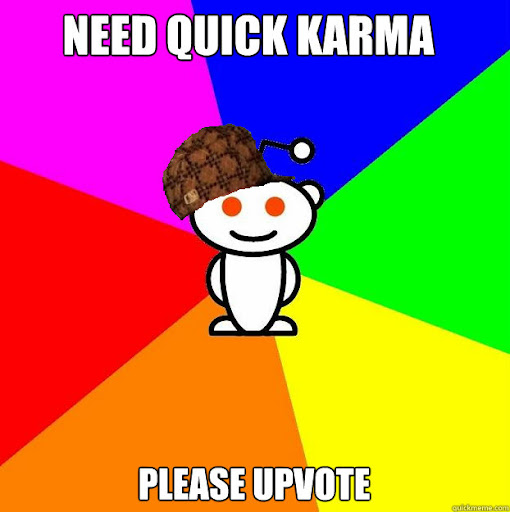